In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the Dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data-Science-ML-Capstone-Projects-master/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#Dropping unnamed column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.shape

(1517, 13)

In [7]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
df['type'].unique()

array(['conventional'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 154.1+ KB


In [10]:
#Checking the null values(if any)
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

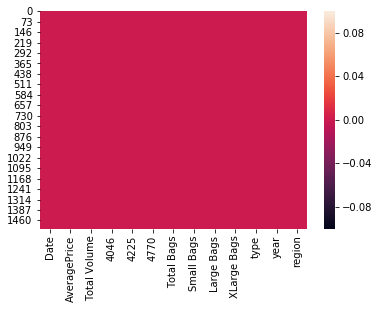

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
df['Date'] = pd.to_datetime(df['Date'])    
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

In [13]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
date_delta             float64
dtype: object

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date_delta
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,359.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,352.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,345.0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,161.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,331.0


In [15]:
#Dropping unnamed column
df.drop(['Date'],axis=1,inplace=True)

In [16]:
df['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [17]:
#Statitical Summary of the data
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,date_delta
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,235.086355
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,170.768853
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,107.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,212.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,331.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,723.000000


In [18]:
#checking the correlation
dfcor=df.corr()

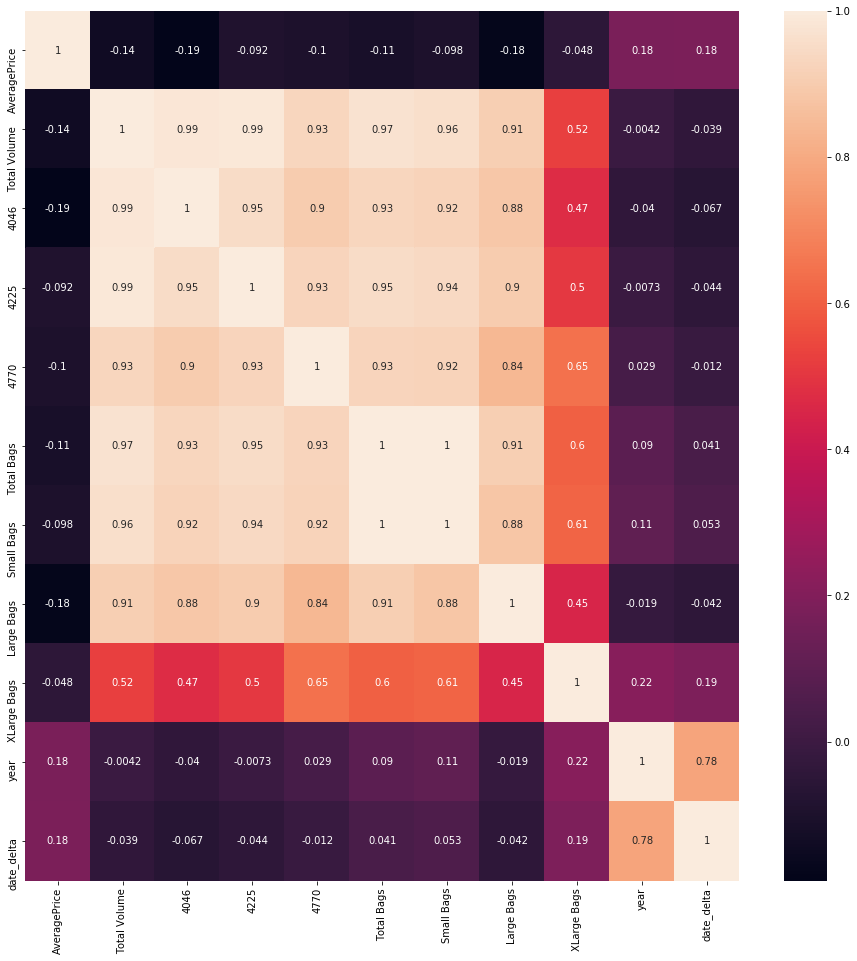

In [19]:
plt.figure(figsize=(16,16))
sns.heatmap(dfcor,annot=True)
plt.show()

In [20]:
#Converting the object columns by using Label Encoder

In [21]:
le=LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [22]:
df['region'] = le.fit_transform(df['region'])

In [23]:
# Univariate Analysis

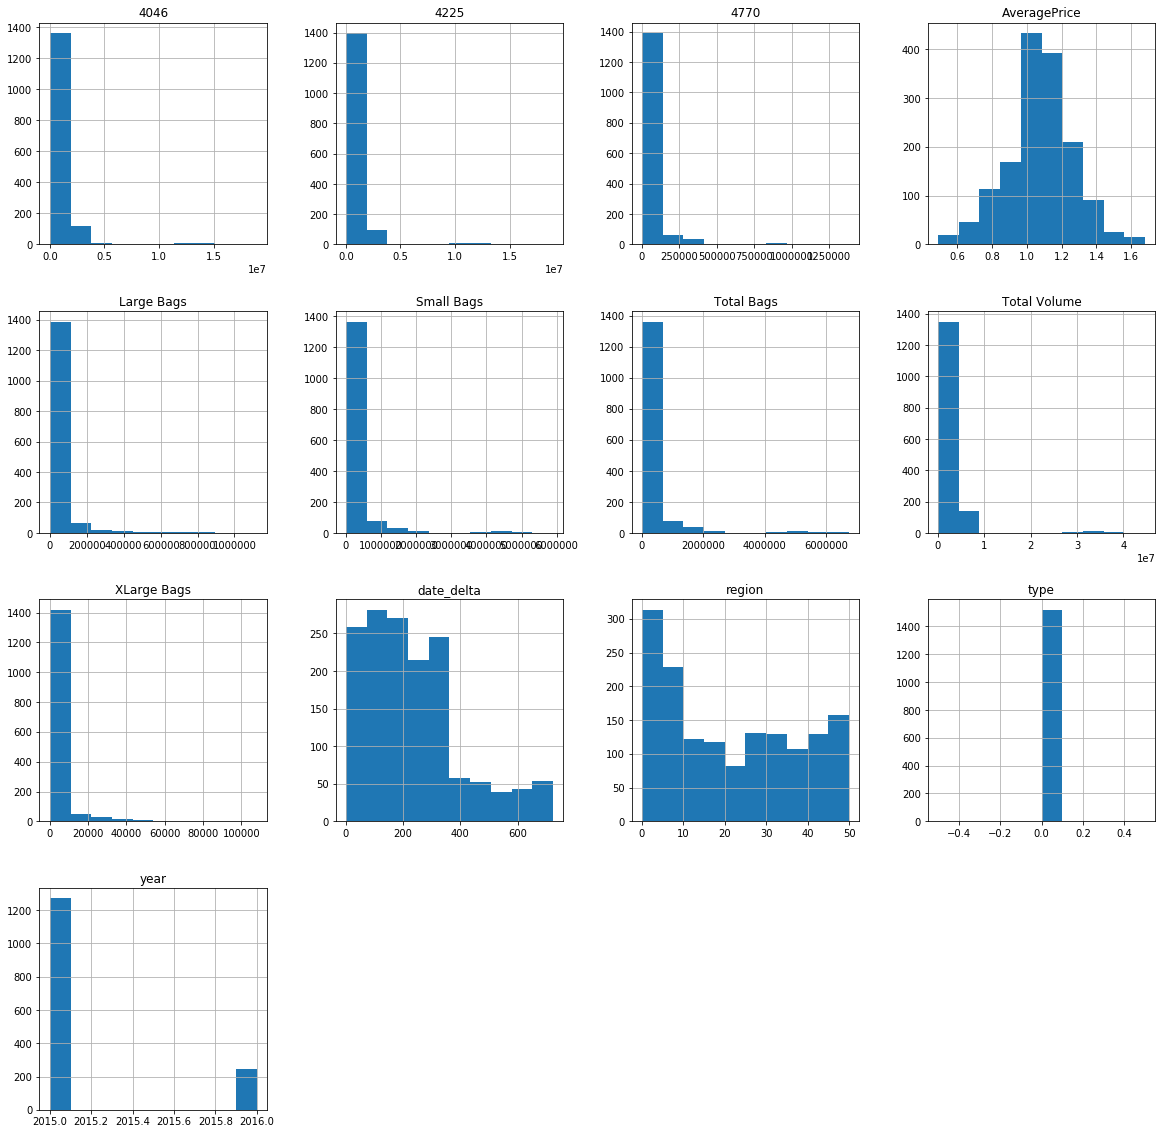

In [24]:
df.hist(figsize=(20,20))
plt.show()

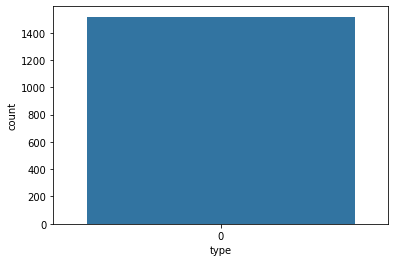

In [25]:
sns.countplot(df['type'])
plt.show()

In [26]:
#Bivariate Analysis

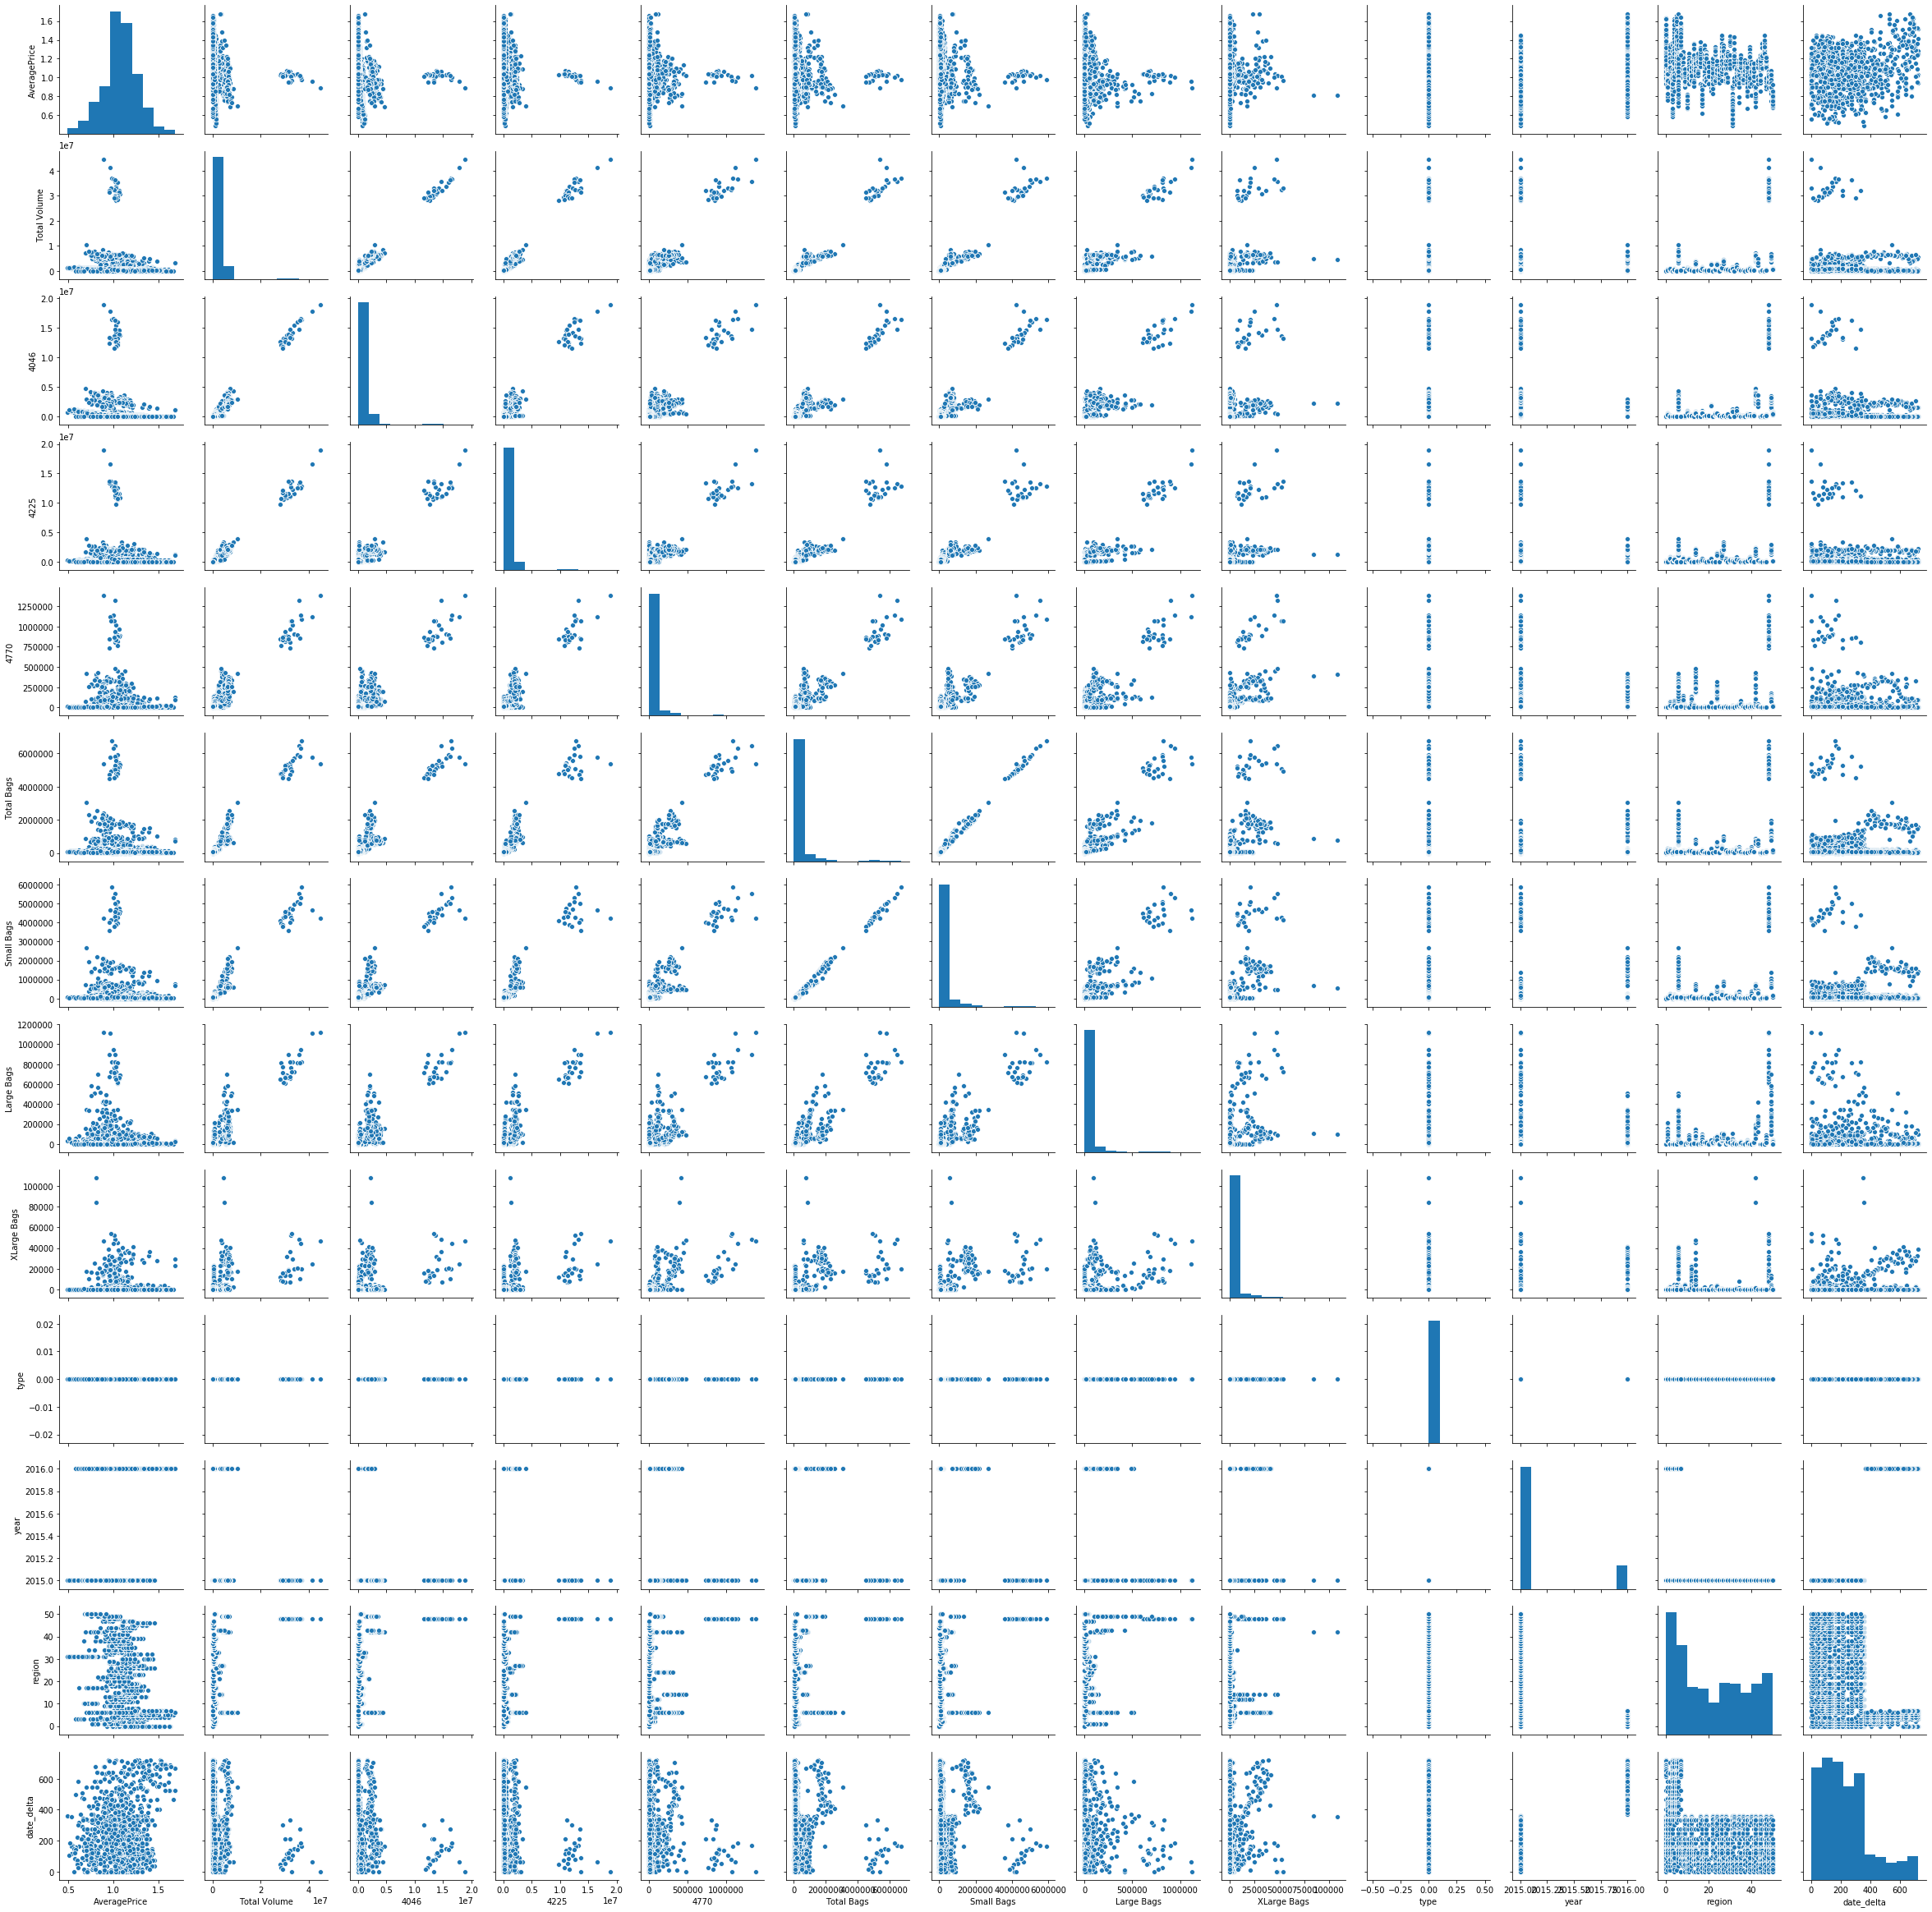

In [27]:
sns.pairplot(df)
plt.show()

In [28]:
df.drop(['year'],axis=1,inplace=True)
df.drop(['date_delta'],axis=1,inplace=True)

In [29]:
collist=df.columns.values
ncol=12
nrows=10

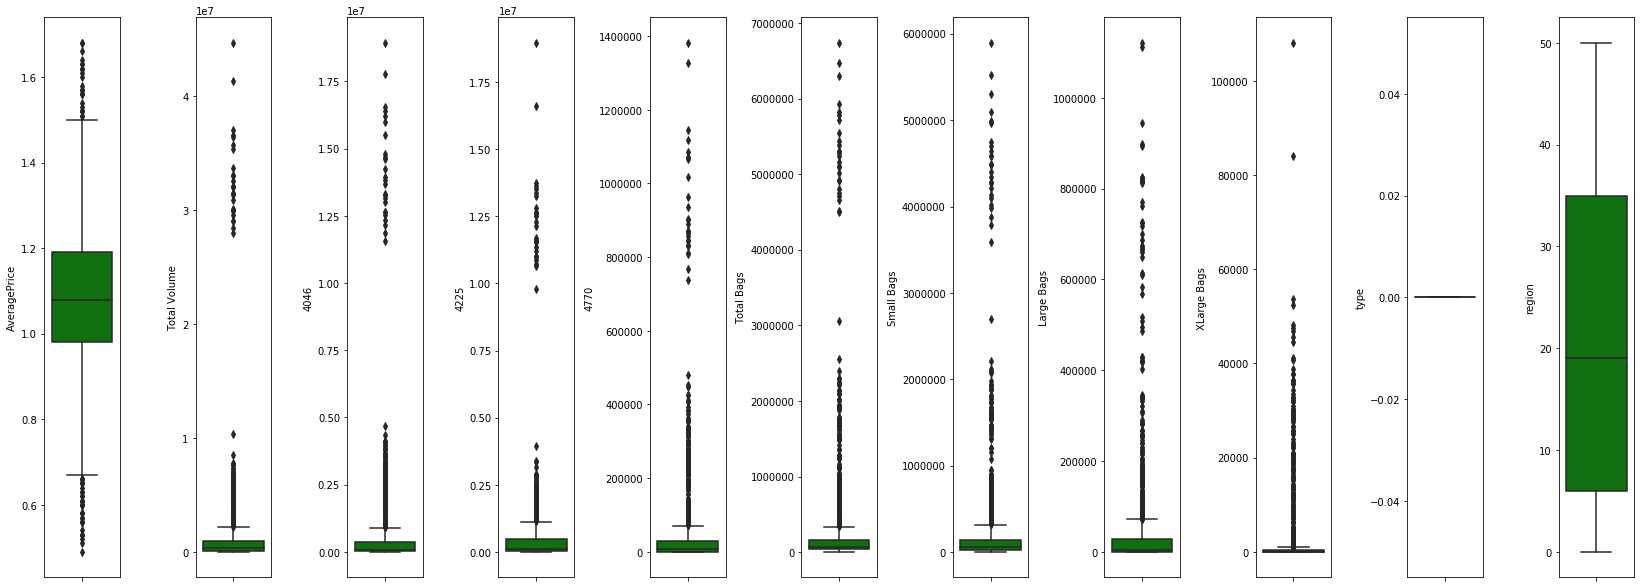

In [30]:
plt.figure(figsize=(25,80))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

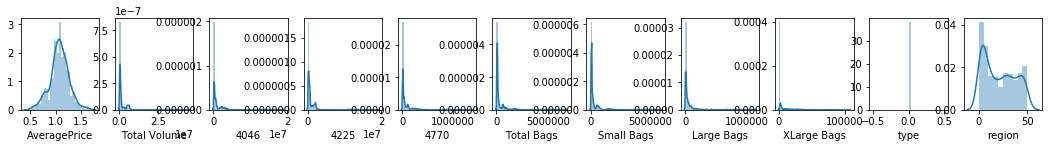

In [31]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

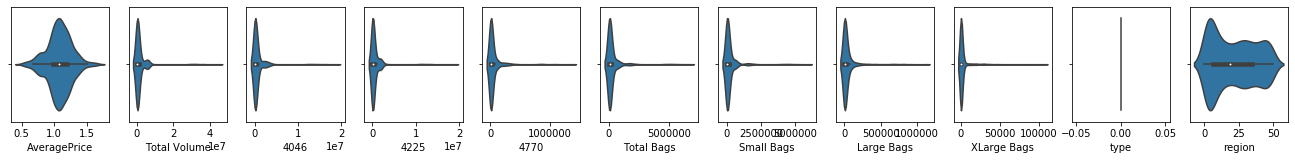

In [32]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.violinplot(df[collist[i]])

In [33]:
#Checking the skewness of the data
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
region          0.288146
dtype: float64

In [34]:
#As there are few skewed values, we try correct it by using log transformation
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [35]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
region          0.288146
dtype: float64

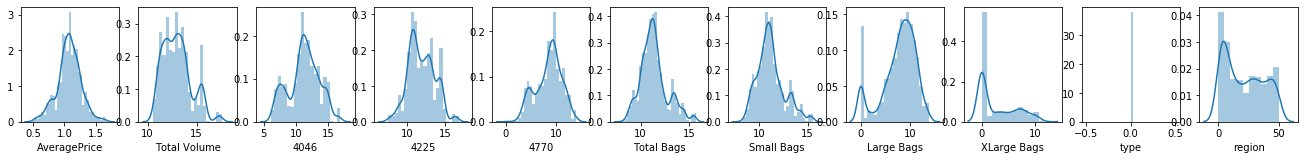

In [36]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

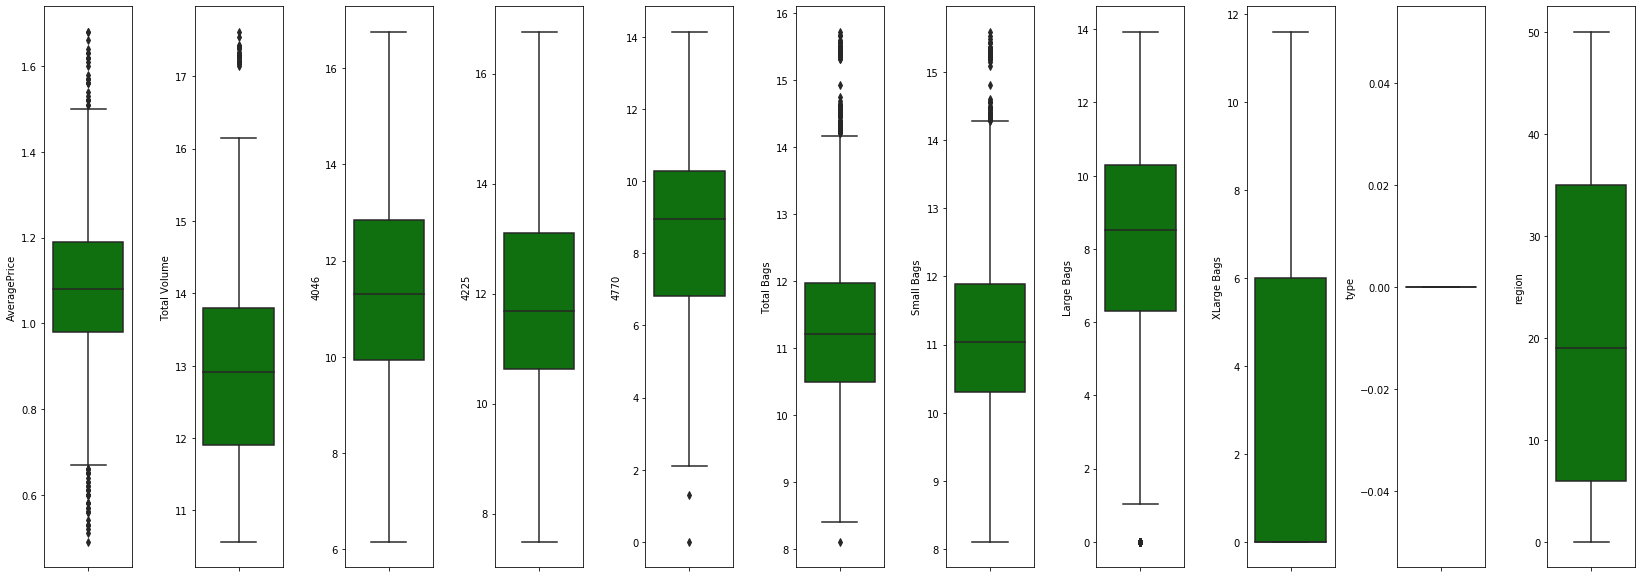

In [37]:
plt.figure(figsize=(25,80))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [38]:
#Checking the Zscore for outliers and removing (if any)
from scipy.stats import zscore
z_score=abs(zscore(df))
df.shape

(1517, 11)

In [39]:
threshold=3
print(np.where(z_score>3))

(array([ 760, 1182, 1182, 1182, 1183, 1183, 1183, 1184, 1184, 1184, 1185,
       1185, 1185, 1186, 1186, 1186, 1187, 1188, 1188, 1188, 1189, 1189,
       1191, 1202, 1346, 1411, 1457, 1458], dtype=int64), array([0, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 6, 1, 5, 6, 1, 5,
       5, 1, 4, 0, 0, 0], dtype=int64))


In [40]:
#separating independent and dependent variables
df_x=df.drop(columns=['AveragePrice'])
y=df[['AveragePrice']]

In [41]:
#Scaling the data using StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.25,random_state=42)

In [43]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1137, 10) (380, 10)
(1137, 1) (380, 1)


In [44]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)
XGR=XGBRegressor(random_state=42)

In [45]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [46]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    mae=mean_absolute_error(y_test,pre)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,3))
    score= cross_val_score(model,df_x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.3523419438617513
Mean_Squared_Error = 0.02229105326411692
Mean_Absolute_Error = 0.11664594642292865
Cross_Val_Score =  0.03948788251807821


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.0006882982938680726
Mean_Squared_Error = 0.03444162540191676
Mean_Absolute_Error = 0.14253990186548166
Cross_Val_Score =  -0.2292630304929663


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.35476434750426666
Mean_

In [47]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error':MAE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Cross_val_score
0,LinearRegression,0.352342,0.022,0.117,0.039
1,Lasso,-0.000688,0.034,0.143,-0.229
2,Ridge,0.354764,0.022,0.116,0.045
3,ElasticNet,-0.000688,0.034,0.143,-0.229
4,DecisionTreeRegressor,0.654579,0.012,0.074,-1.176
5,KNeighborsRegressor,0.766846,0.008,0.067,-0.649
6,AdaBoostRegressor,0.594867,0.014,0.094,-0.188
7,RandomForestRegressor,0.768182,0.008,0.063,-0.040
8,GradientBoostingRegressor,0.725734,0.009,0.073,-0.002
9,XGBRegressor,0.818242,0.006,0.057,-0.532


In [48]:
#Lets use GridsearchCV for hyperparamenter tuning for XGBRegressor
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.25)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [49]:
pipeline=Pipeline([("ss",StandardScaler()),("XGR",XGBRegressor())])
parameters = {"XGR__n_estimators":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="r2")
clf.fit(df_x,y)
clf.best_params_

{'XGR__n_estimators': 10}

In [50]:
pipeline_XGR=Pipeline([("ss",StandardScaler()),("XGR",XGBRegressor(n_neighbors=10))])
maxr2_score(pipeline_XGR,df_x,y)

max r2 score corresponding to  43  is  0.8515997235833289


43

In [51]:
from sklearn.externals import joblib
joblib.dump(XGR,'Avocado_XGR.pkl')

['Avocado_XGR.pkl']

# Using Classification Technique

In [52]:
#Importing all the required libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
#Reading the Dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data-Science-ML-Capstone-Projects-master/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [55]:
#Dropping unnamed column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [56]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [57]:
df.shape

(1517, 13)

In [58]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 154.1+ KB


In [60]:
#Checking the null values(if any)
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [61]:
df['Date'] = pd.to_datetime(df['Date'])    
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

In [62]:
#All the Univariate, Bivariate and other EDA analysis will be same as followed in Regression anaysis

In [63]:
#Dropping unnamed column
df.drop(['Date'],axis=1,inplace=True)

In [64]:
#Converting the object columns by using Label Encoder
le=LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [65]:
df['region'] = le.fit_transform(df['region'])

In [66]:
#Checking the skewness of the data
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
date_delta      0.923615
dtype: float64

In [67]:
#As there are few skewed values, we try correct it by using log transformation
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [68]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region          0.288146
date_delta     -2.065790
dtype: float64

In [69]:
print(df['AveragePrice'].min())
print(df['AveragePrice'].max())

0.49
1.68


In [70]:
#converting target variable into binary values
bins= (0.4, 1.1, 1.8)
values= ['low', 'high']
df['AveragePrice']= pd.cut(df['AveragePrice'], bins = bins, labels = values)

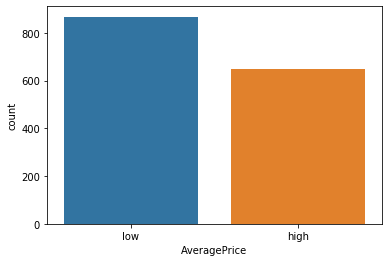

In [71]:
#Checking the count of the binary values
sns.countplot(x="AveragePrice",data=df)
plt.show()

In [72]:
#Separating the variables like indenpendent and the target variable
x=df.drop(columns=["AveragePrice"])
y=df[["AveragePrice"]]

In [73]:
#Scaling the data using Standard Scaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [74]:
#Converting the binary string values using Label Encoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)

In [75]:
#Splitting the data into 2 sets training and the test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=91,stratify=y)

In [76]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1137, 12) (380, 12)
(1137,) (380,)


In [77]:
KNN=KNeighborsClassifier(n_neighbors=4)
SV=SVC()
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=5)
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [78]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DTC))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Accuracy_score =  0.8052631578947368


Cross_Val_Score =  0.5522956895550133


roc_auc_score =  0.8142263436148257


classification_report
               precision    recall  f1-score   support

           0       0.73      0.88      0.79       163
           1       0.89      0.75      0.81       217

    accuracy                           0.81       380
   macro avg       0.81      0.81      0.80       380
weighted avg       0.82      0.81      0.81       380



[[143  20]
 [ 54 163]]


F1_score= 0.815


Precision_score= 0.8907103825136612


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr'

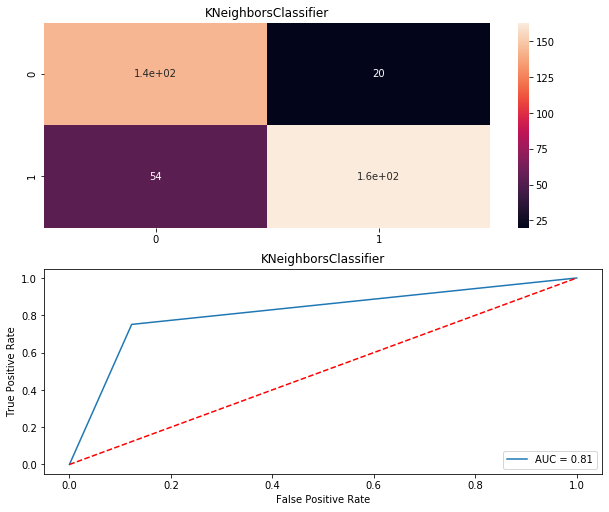

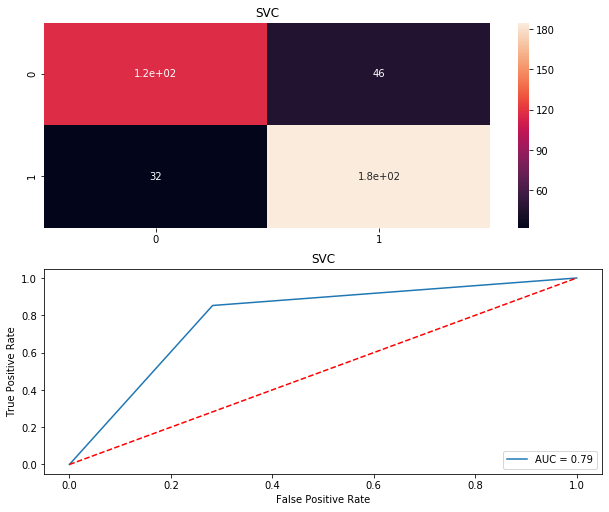

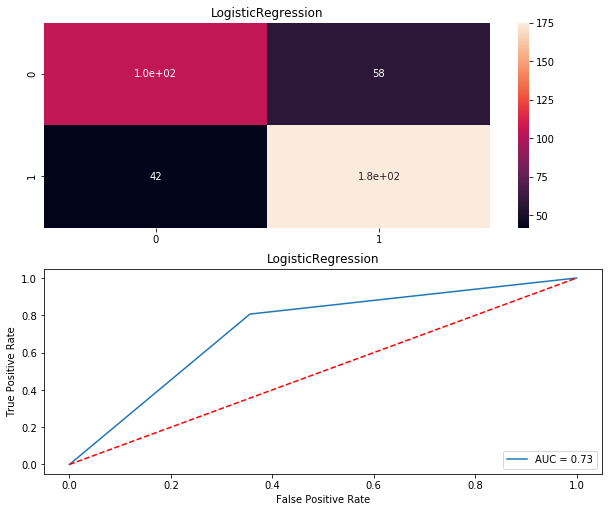

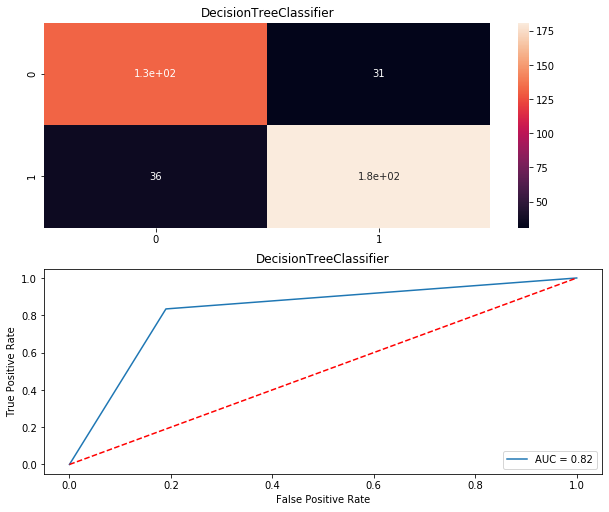

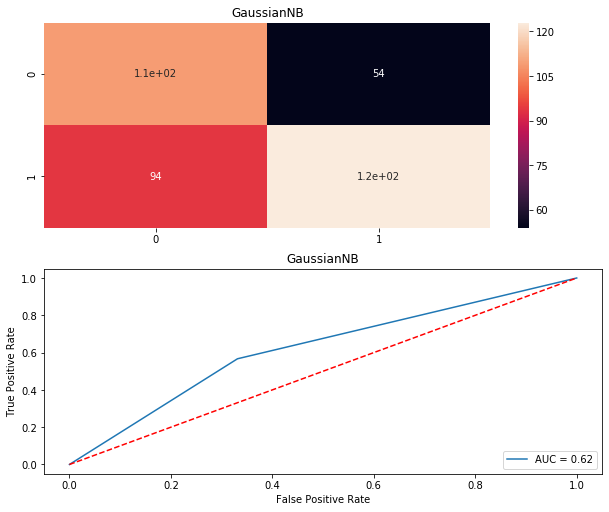

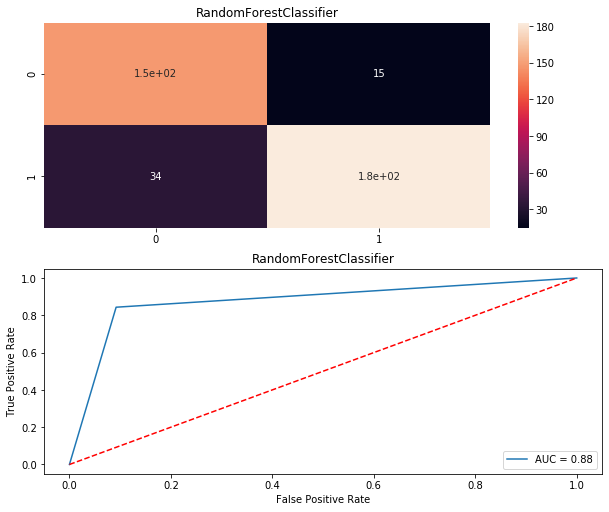

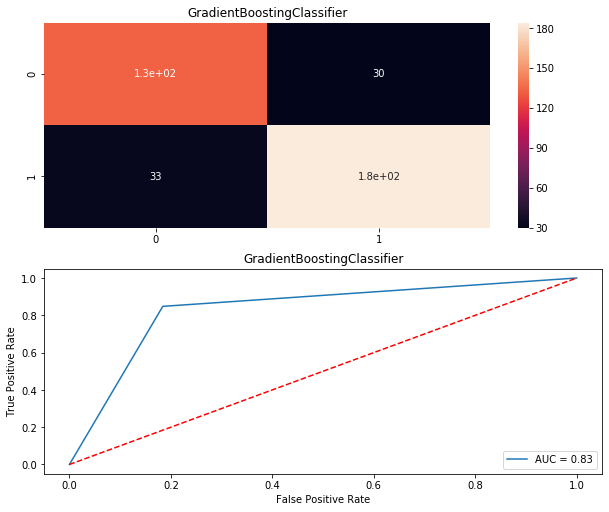

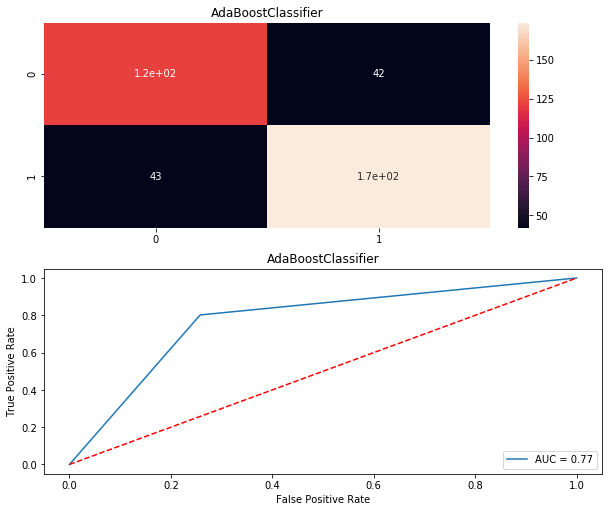

In [79]:
Model = []
score = []
cvs=[]
rocscore=[]
f1score=[]
ps=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    f1s=f1_score(y_test,pred)
    print('F1_score=',f1s)
    f1score.append(f1s*100)
    print('\n')
    precisionscore=precision_score(y_test,pred)
    print('Precision_score=',precisionscore)
    ps.append(precisionscore*100)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [80]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_score':f1s,'Precision_score':ps})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve,F1_score,Precision_score
0,KNeighborsClassifier,80.526316,55.229569,81.422634,0.803695,89.071038
1,SVC,79.473684,65.248408,78.516299,0.803695,80.086580
2,LogisticRegression,73.684211,68.210213,72.531170,0.803695,75.107296
3,DecisionTreeClassifier,82.368421,55.244034,82.195867,0.803695,85.377358
4,GaussianNB,61.052632,60.849686,61.776597,0.803695,69.491525
5,RandomForestClassifier,87.105263,55.206675,87.564672,0.803695,92.424242
6,GradientBoostingClassifier,83.421053,60.526420,83.193859,0.803695,85.981308
7,AdaBoostClassifier,77.631579,62.632578,77.208730,0.803695,80.555556


In [81]:
#Lets use GridsearchCV for hyperparamenter tuning for Random Forest Classifier
def maxacc_score(regr,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.25,stratify=y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [82]:
pipeline=Pipeline([("ss",StandardScaler()),("RFC",RandomForestClassifier())])
parameters = {"RFC__n_estimators":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'RFC__n_estimators': 500}

In [83]:
pipeline_RFC=Pipeline([("ss",StandardScaler()),("RFC",RandomForestClassifier(n_estimators=200))])
maxacc_score(pipeline_RFC,x,y)

max accuracy score corresponding to  91  is  0.8868421052631579


91

In [84]:
from sklearn.externals import joblib
joblib.dump(RFC,"Avacado_RFC.pkl")

['Avacado_RFC.pkl']